<a href="https://colab.research.google.com/github/Suruchi264/NLP-DL-ML/blob/main/Random_Forest_regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used Car Price Prediction

## 1) Problem statement.

* This dataset comprises used cars sold on cardehko.com in India as well as important features of these cars.
* If user can predict the price of the car based on input features.
* Prediction results can be used to give new seller the price suggestion based on market condition.

## 2) Data Collection.
* The Dataset is collected from scrapping from cardheko webiste
* The data consists of 13 column and 15411 rows.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df = pd.read_csv(r"./data/cardekho_imputated.csv", index_col=[0])

In [ ]:
df.head()

## Data Cleaning
### Handling Missing values



* Handling Missing values
* Handling Duplicates
* Check data type
* Understand the dataset

In [ ]:
## Check Null Values
##Check features with nan value
df.isnull().sum()

In [ ]:
## Remove Unnecessary Columns
df.drop('car_name', axis=1, inplace=True)
df.drop('brand', axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df['model'].unique()

In [ ]:
## Getting All Different Types OF Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

In [ ]:
## Indpendent and dependent features
from sklearn.model_selection import train_test_split
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [ ]:
X.head()

## Feature Encoding and Scaling
**One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [ ]:
len(df['model'].unique())

In [ ]:
df['model'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['model']=le.fit_transform(X['model'])

In [ ]:
X.head()

In [ ]:
len(df['seller_type'].unique()),len(df['fuel_type'].unique()),len(df['transmission_type'].unique())

df['seller_type'].unique():
Returns an array of all unique values in the seller_type column of your DataFrame df.
Example: If seller_type contains ['Dealer', 'Individual', 'Trustmark Dealer'], this will return those three unique values.

len(...):
Counts the number of unique values in each column.

So:

len(df['seller_type'].unique()) gives the number of unique seller types.
len(df['fuel_type'].unique()) gives the number of unique fuel types.
len(df['transmission_type'].unique()) gives the number of unique transmission types.
The output is a tuple:
For example, (3, 4, 2) means there are 3 seller types, 4 fuel types, and 2 transmission types in your dataset.




Purpose
Why do this?
To understand how many categories each of these categorical features has.
This is important for encoding (like one-hot encoding), as each unique value will become a new column.
Mathematical Intuition
Categorical Encoding:
If a column has ( k ) unique values, one-hot encoding will create ( k-1 ) new columns (if drop='first' is used).
Knowing the number of unique values helps you anticipate the dimensionality increase after encoding.

In [ ]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['seller_type','fuel_type','transmission_type']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
        ("StandardScaler", numeric_transformer, num_features)

    ],remainder='passthrough'

)

Meaning:

Identifies numerical and categorical columns.
Applies StandardScaler to numerical columns (mean=0, std=1).
Applies OneHotEncoder to categorical columns (converts categories to binary columns, dropping the first to avoid redundancy).
remainder='passthrough' keeps any columns not listed unchanged.
Purpose:
To convert all features into a numeric format suitable for machine learning and to ensure features are on a comparable scale.

Mathematical Intuition:

Standardization:
[ x' = \frac{x - \mu}{\sigma} ] This helps algorithms that are sensitive to feature scale (like KNN, linear models).
One-hot encoding:
Converts each category into a new column with 0/1 values, allowing models to interpret categorical data.

In [ ]:
X=preprocessor.fit_transform(X)

In [ ]:
pd.DataFrame(X)

In [ ]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

Meaning:
Splits the data into training (80%) and testing (20%) sets.

Purpose:
To evaluate model performance on unseen data and prevent overfitting.

In [ ]:
X_train

## Model Training And Model Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

Meaning:
Defines a function to compute:

MAE (Mean Absolute Error): Average absolute difference between actual and predicted values.
RMSE (Root Mean Squared Error): Square root of average squared differences.
R2 Score: Proportion of variance explained by the model.
Purpose:
To provide consistent metrics for comparing model performance.

Mathematical Intuition:

MAE:
[ \text{MAE} = \frac{1}{n} \sum |y_i - \hat{y}_i| ]
RMSE:
[ \text{RMSE} = \sqrt{\frac{1}{n} \sum (y_i - \hat{y}_i)^2} ]
R2 Score:
[ R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} ]

In [ ]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),

}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Meaning:

Trains each regression model on the training data.
Predicts on both train and test sets.
Evaluates and prints MAE, RMSE, and R2 for both sets.
Purpose:
To compare different regression algorithms and identify which performs best.

Mathematical Intuition:

Overfitting: High train performance, low test performance.
Underfitting: Low performance on both.
Good fit: Similar, high performance on both.

In [ ]:
#Initialize few parameter for Hyperparamter tuning
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}


Meaning:

Defines parameter grids for KNN and Random Forest.
Uses RandomizedSearchCV to search for the best hyperparameters using 3-fold cross-validation.
Prints the best parameters found.
Purpose:
To optimize model performance by tuning key hyperparameters.

Mathematical Intuition:

Cross-validation: Reduces overfitting by validating on multiple splits.
Random search: Efficiently explores the parameter space.

In [ ]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params)

                   ]

In [ ]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

In [ ]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features='auto', max_depth=None,
                                                     n_jobs=-1),
     "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=10, n_jobs=-1)

}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Meaning:

Retrains the best models with their optimal hyperparameters.
Evaluates and prints their performance.
Purpose:
To get the final, most accurate models for your regression problem.

Mathematical Intuition:

Using tuned hyperparameters should improve generalization and predictive accuracy.

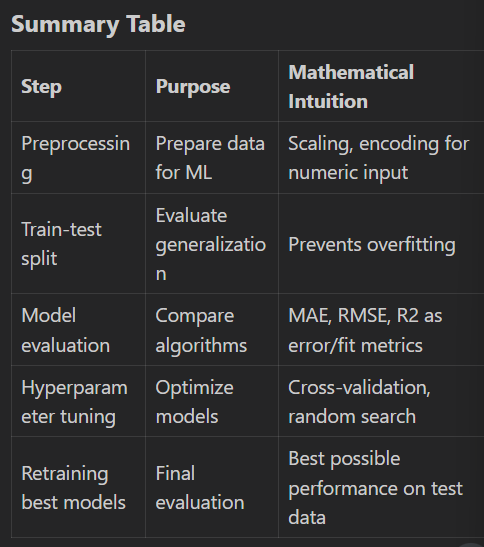




This code prepares your data, compares several regression models, tunes the best ones, and then evaluates their final performance using robust metrics. This ensures you select the most accurate and reliable model for predicting used car prices.